# EDA: Instagram Usage & Lifestyle Impact Analysis

**Fecha:** 2026-01-30
**Integrantes:** Juan Andrés Montoya, Julián David Mejía

**Fuente de datos seleccionada:** Kaggle - Social Media User Analysis
https://www.kaggle.com/datasets/rockyt07/social-media-user-analysis

**Dataset 2:** https://www.kaggle.com/datasets/dhrubangtalukdar/200-years-of-global-major-earthquakes-18262026

**Dataset 3:** https://www.kaggle.com/datasets/aldinwhyudii/student-depression-and-lifestyle-100k-data

---
## 0) Setup & Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder

plt.style.use('ggplot')
pd.set_option('display.max_columns', 60)
pd.set_option('display.float_format', lambda x: f'{x:,.4f}')

---
## 1) Business Understanding

### Contexto y Objetivo

Meta enfrenta una decadencia en la imagen pública de Instagram asociada a reportes y percepciones de impactos negativos en salud mental y física parcialmente atribuibles al uso de redes sociales. El comité ético busca una estrategia que **aumente el uso de Instagram minimizando (o mejorando) la calidad de vida** de sus usuarios.

### Pregunta de Negocio

**¿Cómo incrementar el uso de Instagram (frecuencia, duración, recurrencia) sin deteriorar —y preferiblemente mejorando— la calidad de vida percibida y objetiva de sus usuarios?**

### Métricas Clave (KPIs)

**Uso/Engagement:**
- Tiempo diario de uso en Instagram (minutos)
- Sesiones por día
- Interacciones (posts, likes, comments, DMs)

**Bienestar:**
- Felicidad percibida (auto-reportada)
- Estrés percibido (auto-reportado)
- Horas de sueño
- Actividad física (ejercicio, pasos diarios)

**Objetivo Estratégico:** Lograr "*Engagement Responsable*" = aumento en uso **sin deterioro** en indicadores de bienestar.

---
## 2) Data Understanding

### Descripción General del Dataset

In [3]:
df = pd.read_csv('instagram_usage_lifestyle.csv')
print(f"Shape: {df.shape}")
print(f"Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
df.head()

Shape: (1547896, 58)
Memoria utilizada: 2101.60 MB


,user_id,app_name,age,gender,country,urban_rural,income_level,employment_status,education_level,relationship_status,has_children,exercise_hours_per_week,sleep_hours_per_night,diet_quality,smoking,alcohol_frequency,perceived_stress_score,self_reported_happiness,body_mass_index,blood_pressure_systolic,blood_pressure_diastolic,daily_steps_count,weekly_work_hours,hobbies_count,social_events_per_month,books_read_per_year,volunteer_hours_per_month,travel_frequency_per_year,daily_active_minutes_instagram,sessions_per_day,posts_created_per_week,reels_watched_per_day,stories_viewed_per_day,likes_given_per_day,comments_written_per_day,dms_sent_per_week,dms_received_per_week,ads_viewed_per_day,ads_clicked_per_day,time_on_feed_per_day,time_on_explore_per_day,time_on_messages_per_day,time_on_reels_per_day,followers_count,following_count,uses_premium_features,notification_response_rate,account_creation_year,last_login_date,average_session_length_minutes,content_type_preference,preferred_content_theme,privacy_setting_level,two_factor_auth_enabled,biometric_login_used,linked_accounts_count,subscription_status,user_engagement_score
0,1,Instagram,51,Female,India,Rural,High,Retired,Bachelor’s,Single,No,7.2000,7.7000,Good,No,Rarely,3,8,20.8000,148,86,8107,49.9000,3,4,7,4.3000,0,5.0000,1,3,42,28,28,5,12,12,4,1,2,1,1,2,374,647,No,0.3400,2015,2025-11-02,5.0000,Mixed,Tech,Private,Yes,No,0,Free,7.8300
1,2,Instagram,64,Female,United Kingdom,Urban,Middle,Full-time employed,Other,Divorced,No,10.9000,8.6000,Very poor,No,Rarely,1,1,23.5000,133,84,8059,15.6000,0,5,10,4.7000,2,74.0000,5,3,78,54,68,15,18,10,11,1,31,19,16,19,2585,3511,No,0.5600,2018,2025-03-22,14.8000,Photos,Fashion,Public,No,No,3,Free,1.4300
2,3,Instagram,41,Female,Canada,Urban,Middle,Student,Bachelor’s,In a relationship,No,5.0000,6.7000,Good,No,Rarely,4,10,28.6000,135,88,7872,31.8000,4,5,14,1.5000,2,5.0000,1,7,29,26,25,6,12,13,4,0,3,1,1,1,3414,6761,No,0.7300,2011,2025-08-10,5.0000,Mixed,Other,Public,Yes,Yes,1,Free,9.6700
3,4,Instagram,27,Non-binary,South Korea,Urban,Middle,Unemployed,Master’s,In a relationship,No,10.6000,6.5000,Poor,Yes,Never,18,1,22.5000,105,73,7801,43.4000,2,3,13,3.3000,4,233.0000,9,5,241,109,132,36,31,32,33,3,108,64,52,64,617,1193,No,0.7300,2019,2025-03-31,25.9000,Stories,Tech,Private,No,No,1,Free,0.9400
4,5,Instagram,55,Male,India,Urban,Upper-middle,Full-time employed,Bachelor’s,Single,No,7.7000,6.8000,Average,No,Never,19,1,28.1000,146,90,8005,50.2000,2,2,12,4.5000,3,184.0000,14,5,146,113,103,36,29,37,20,5,78,55,22,55,1157,1072,Yes,0.6500,2017,2025-03-19,13.1000,Videos,Food,Public,Yes,No,0,Free,1.0300


### Inspección de tipos y calidad de datos

In [4]:
df.columns

Index(['user_id', 'app_name', 'age', 'gender', 'country', 'urban_rural',
       'income_level', 'employment_status', 'education_level',
       'relationship_status', 'has_children', 'exercise_hours_per_week',
       'sleep_hours_per_night', 'diet_quality', 'smoking', 'alcohol_frequency',
       'perceived_stress_score', 'self_reported_happiness', 'body_mass_index',
       'blood_pressure_systolic', 'blood_pressure_diastolic',
       'daily_steps_count', 'weekly_work_hours', 'hobbies_count',
       'social_events_per_month', 'books_read_per_year',
       'volunteer_hours_per_month', 'travel_frequency_per_year',
       'daily_active_minutes_instagram', 'sessions_per_day',
       'posts_created_per_week', 'reels_watched_per_day',
       'stories_viewed_per_day', 'likes_given_per_day',
       'comments_written_per_day', 'dms_sent_per_week',
       'dms_received_per_week', 'ads_viewed_per_day', 'ads_clicked_per_day',
       'time_on_feed_per_day', 'time_on_explore_per_day',
       'time_on_

In [5]:
df.dtypes

user_id                             int64
app_name                           object
age                                 int64
gender                             object
country                            object
urban_rural                        object
income_level                       object
employment_status                  object
education_level                    object
relationship_status                object
has_children                       object
exercise_hours_per_week           float64
sleep_hours_per_night             float64
diet_quality                       object
smoking                            object
alcohol_frequency                  object
perceived_stress_score              int64
self_reported_happiness             int64
body_mass_index                   float64
blood_pressure_systolic             int64
blood_pressure_diastolic            int64
daily_steps_count                   int64
weekly_work_hours                 float64
hobbies_count                     

Todos las columnas parecen tener los formatos correctos para el análisis.

In [6]:
### Profiling de datos: tipos y cardinality

# Resumen de tipos de datos
print("=== RESUMEN DE TIPOS DE DATOS ===")
print(df.dtypes.value_counts())
print(f"\nTotal columnas: {len(df.columns)}")
print(f"Columnas numéricas: {df.select_dtypes(include='number').shape[1]}")
print(f"Columnas categóricas/texto: {df.select_dtypes(include='object').shape[1]}")
print(f"Columnas datetime: {df.select_dtypes(include='datetime').shape[1]}")

=== RESUMEN DE TIPOS DE DATOS ===
int64      29
object     20
float64     9
Name: count, dtype: int64

Total columnas: 58
Columnas numéricas: 38
Columnas categóricas/texto: 20
Columnas datetime: 0


### Revisión de valores faltantes y duplicados

### Distribución de variables categóricas clave

In [7]:
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Mostrar distribución de variables categóricas principales
key_categorical = ['gender', 'country', 'urban_rural', 'employment_status', 
                   'relationship_status', 'has_children', 'income_level']

for col in key_categorical:
    if col in cat_cols:
        print(f"\n{'='*50}")
        print(f"Variable: {col}")
        print(f"{'='*50}")
        dist = df[col].value_counts()
        pct = (dist / len(df) * 100).round(2)
        result = pd.DataFrame({'Conteo': dist, 'Porcentaje': pct})
        print(result)



Variable: gender
                   Conteo  Porcentaje
gender                               
Male               743169     48.0100
Female             742847     47.9900
Non-binary          46196      2.9800
Prefer not to say   15684      1.0100

Variable: country
                Conteo  Porcentaje
country                           
United States   386829     24.9900
India           278342     17.9800
Brazil          186258     12.0300
Other           154572      9.9900
United Kingdom  123411      7.9700
Canada          108584      7.0100
Australia        92522      5.9800
South Korea      78050      5.0400
Germany          77329      5.0000
Japan            61999      4.0100

Variable: urban_rural
             Conteo  Porcentaje
urban_rural                    
Urban        850754     54.9600
Suburban     464605     30.0200
Rural        232537     15.0200

Variable: employment_status
                    Conteo  Porcentaje
employment_status                     
Full-time employed  69538

In [8]:
print("Valores nulos por columna:")
df.isna().sum()

Valores nulos por columna:


user_id                           0
app_name                          0
age                               0
gender                            0
country                           0
urban_rural                       0
income_level                      0
employment_status                 0
education_level                   0
relationship_status               0
has_children                      0
exercise_hours_per_week           0
sleep_hours_per_night             0
diet_quality                      0
smoking                           0
alcohol_frequency                 0
perceived_stress_score            0
self_reported_happiness           0
body_mass_index                   0
blood_pressure_systolic           0
blood_pressure_diastolic          0
daily_steps_count                 0
weekly_work_hours                 0
hobbies_count                     0
social_events_per_month           0
books_read_per_year               0
volunteer_hours_per_month         0
travel_frequency_per_year   

In [9]:
print(f"Registros duplicados: {df.duplicated().sum()}")

Registros duplicados: 0


### Validez de datos: rangos y valores esperados

In [10]:
# Validez de variables clave
print("=== VALIDACIÓN DE RANGOS ===\n")

# Variables de bienestar (deben estar en rangos esperados, típicamente 0-100)
wellness_vars = ['perceived_stress_score', 'self_reported_happiness']
for var in wellness_vars:
    if var in df.columns:
        print(f"{var}:")
        print(f"  Rango: [{df[var].min():.2f}, {df[var].max():.2f}]")
        print(f"  Media: {df[var].mean():.2f}, Mediana: {df[var].median():.2f}")
        print()

# Variables de tiempo/actividad (deben ser positivas)
time_vars = ['daily_active_minutes_instagram', 'sleep_hours_per_night', 
             'exercise_hours_per_week', 'weekly_work_hours']
print("\nVariables de tiempo (deben ser positivas):")
for var in time_vars:
    if var in df.columns:
        has_negative = (df[var] < 0).sum()
        print(f"{var}: Min={df[var].min():.2f}, Max={df[var].max():.2f}, " + 
              f"Negativos={has_negative}")

# Validez de edad
if 'age' in df.columns:
    print(f"\nEdad: Rango [{df['age'].min()}, {df['age'].max()}]")
    print(f"  Fuera de rango (0-120): {((df['age'] < 0) | (df['age'] > 120)).sum()} registros")

# Validez de BMI (body mass index, típicamente 10-60)
if 'body_mass_index' in df.columns:
    print(f"\nIMC: Rango [{df['body_mass_index'].min():.2f}, {df['body_mass_index'].max():.2f}]")
    print(f"  Fuera de rango (10-60): {((df['body_mass_index'] < 10) | (df['body_mass_index'] > 60)).sum()} registros")


=== VALIDACIÓN DE RANGOS ===

perceived_stress_score:
  Rango: [0.00, 40.00]
  Media: 19.99, Mediana: 20.00

self_reported_happiness:
  Rango: [1.00, 10.00]
  Media: 5.50, Mediana: 5.00


Variables de tiempo (deben ser positivas):
daily_active_minutes_instagram: Min=5.00, Max=580.00, Negativos=0
sleep_hours_per_night: Min=3.00, Max=10.00, Negativos=0
exercise_hours_per_week: Min=0.00, Max=24.10, Negativos=0
weekly_work_hours: Min=0.00, Max=80.00, Negativos=0

Edad: Rango [13, 65]
  Fuera de rango (0-120): 0 registros

IMC: Rango [15.00, 45.00]
  Fuera de rango (10-60): 0 registros


**Hallazgo:** El dataset ya venía limpio. No se encuentran valores vacíos ni duplicados.

---
## 3) Data Preparation

### Selección estratégica de variables

Se realiza una **selección estratégica de variables** priorizando aquellas que permiten:
- Analizar el uso y engagement dentro de la plataforma
- Medir el impacto del consumo en el bienestar del usuario
- Segmentar usuarios para evitar estrategias de crecimiento homogéneas
- Mantener variables accionables desde el punto de vista de producto

In [11]:
df_filtered=df[[
    # Demográficas
    'age', 'gender', 'country', 'urban_rural',
    'income_level', 'employment_status', 'education_level',
    'relationship_status', 'has_children',
    
    # Bienestar y Salud
    'exercise_hours_per_week', 'sleep_hours_per_night',
    'diet_quality', 'smoking', 'alcohol_frequency',
    'perceived_stress_score', 'self_reported_happiness',
    'body_mass_index', 'blood_pressure_systolic', 'blood_pressure_diastolic',
    'daily_steps_count', 'weekly_work_hours',
    
    # Actividades offline
    'hobbies_count', 'social_events_per_month',
    'books_read_per_year', 'volunteer_hours_per_month', 'travel_frequency_per_year',
    
    # Uso y Engagement en Instagram (CORE)
    'daily_active_minutes_instagram', 'sessions_per_day',
    'posts_created_per_week', 'reels_watched_per_day',
    'stories_viewed_per_day', 'likes_given_per_day',
    'comments_written_per_day', 'dms_sent_per_week',
    'dms_received_per_week', 'ads_viewed_per_day', 'ads_clicked_per_day',
    'time_on_feed_per_day', 'time_on_explore_per_day',
    'time_on_messages_per_day', 'time_on_reels_per_day',
    'followers_count', 'notification_response_rate',
    'last_login_date', 'average_session_length_minutes',
    'content_type_preference', 'preferred_content_theme',
    'user_engagement_score'
]].copy()

print(f"Dataset filtrado: {df_filtered.shape}")
df_filtered.head()

Dataset filtrado: (1547896, 48)


,age,gender,country,urban_rural,income_level,employment_status,education_level,relationship_status,has_children,exercise_hours_per_week,sleep_hours_per_night,diet_quality,smoking,alcohol_frequency,perceived_stress_score,self_reported_happiness,body_mass_index,blood_pressure_systolic,blood_pressure_diastolic,daily_steps_count,weekly_work_hours,hobbies_count,social_events_per_month,books_read_per_year,volunteer_hours_per_month,travel_frequency_per_year,daily_active_minutes_instagram,sessions_per_day,posts_created_per_week,reels_watched_per_day,stories_viewed_per_day,likes_given_per_day,comments_written_per_day,dms_sent_per_week,dms_received_per_week,ads_viewed_per_day,ads_clicked_per_day,time_on_feed_per_day,time_on_explore_per_day,time_on_messages_per_day,time_on_reels_per_day,followers_count,notification_response_rate,last_login_date,average_session_length_minutes,content_type_preference,preferred_content_theme,user_engagement_score
0,51,Female,India,Rural,High,Retired,Bachelor’s,Single,No,7.2000,7.7000,Good,No,Rarely,3,8,20.8000,148,86,8107,49.9000,3,4,7,4.3000,0,5.0000,1,3,42,28,28,5,12,12,4,1,2,1,1,2,374,0.3400,2025-11-02,5.0000,Mixed,Tech,7.8300
1,64,Female,United Kingdom,Urban,Middle,Full-time employed,Other,Divorced,No,10.9000,8.6000,Very poor,No,Rarely,1,1,23.5000,133,84,8059,15.6000,0,5,10,4.7000,2,74.0000,5,3,78,54,68,15,18,10,11,1,31,19,16,19,2585,0.5600,2025-03-22,14.8000,Photos,Fashion,1.4300
2,41,Female,Canada,Urban,Middle,Student,Bachelor’s,In a relationship,No,5.0000,6.7000,Good,No,Rarely,4,10,28.6000,135,88,7872,31.8000,4,5,14,1.5000,2,5.0000,1,7,29,26,25,6,12,13,4,0,3,1,1,1,3414,0.7300,2025-08-10,5.0000,Mixed,Other,9.6700
3,27,Non-binary,South Korea,Urban,Middle,Unemployed,Master’s,In a relationship,No,10.6000,6.5000,Poor,Yes,Never,18,1,22.5000,105,73,7801,43.4000,2,3,13,3.3000,4,233.0000,9,5,241,109,132,36,31,32,33,3,108,64,52,64,617,0.7300,2025-03-31,25.9000,Stories,Tech,0.9400
4,55,Male,India,Urban,Upper-middle,Full-time employed,Bachelor’s,Single,No,7.7000,6.8000,Average,No,Never,19,1,28.1000,146,90,8005,50.2000,2,2,12,4.5000,3,184.0000,14,5,146,113,103,36,29,37,20,5,78,55,22,55,1157,0.6500,2025-03-19,13.1000,Videos,Food,1.0300


Se filtran columnas consideradas redundantes o irrelevantes para la necesidad del negocio.

### Estadísticas descriptivas

In [12]:
df_filtered.describe()

,age,exercise_hours_per_week,sleep_hours_per_night,perceived_stress_score,self_reported_happiness,body_mass_index,blood_pressure_systolic,blood_pressure_diastolic,daily_steps_count,weekly_work_hours,hobbies_count,social_events_per_month,books_read_per_year,volunteer_hours_per_month,travel_frequency_per_year,daily_active_minutes_instagram,sessions_per_day,posts_created_per_week,reels_watched_per_day,stories_viewed_per_day,likes_given_per_day,comments_written_per_day,dms_sent_per_week,dms_received_per_week,ads_viewed_per_day,ads_clicked_per_day,time_on_feed_per_day,time_on_explore_per_day,time_on_messages_per_day,time_on_reels_per_day,followers_count,notification_response_rate,average_session_length_minutes,user_engagement_score
count,"1,547,896.0000","1,547,896.0000","1,547,896.0000","1,547,896.0000","1,547,896.0000","1,547,896.0000","1,547,896.0000","1,547,896.0000","1,547,896.0000","1,547,896.0000","1,547,896.0000","1,547,896.0000","1,547,896.0000","1,547,896.0000","1,547,896.0000","1,547,896.0000","1,547,896.0000","1,547,896.0000","1,547,896.0000","1,547,896.0000","1,547,896.0000","1,547,896.0000","1,547,896.0000","1,547,896.0000","1,547,896.0000","1,547,896.0000","1,547,896.0000","1,547,896.0000","1,547,896.0000","1,547,896.0000","1,547,896.0000","1,547,896.0000","1,547,896.0000","1,547,896.0000"
mean,38.9854,7.1435,6.9994,19.9877,5.4998,25.0008,124.4917,79.5001,"8,000.1046",40.0015,2.9961,3.9988,10.0016,3.9976,2.9997,188.2298,10.3290,5.9603,175.6081,101.1600,119.1122,34.2129,28.8159,30.5833,20.0512,4.7650,94.1304,37.6204,32.9520,56.4766,"2,160.5426",0.5002,20.5097,1.6446
std,15.2945,3.9946,1.0971,11.8326,2.8712,3.9762,20.2070,11.5487,89.3976,9.9973,1.7305,2.0004,3.1608,2.4136,1.7320,110.1278,7.9311,3.8882,76.2204,38.7907,56.1464,17.4665,12.2466,14.3285,9.8645,3.1044,56.4984,25.3579,21.4457,35.3478,"3,402.0159",0.2888,8.6975,1.8127
min,13.0000,0.0000,3.0000,0.0000,1.0000,15.0000,90.0000,60.0000,"7,566.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000,1.0000,0.0000,18.0000,12.0000,8.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,1.0000,1.0000,1.0000,10.0000,0.0000,5.0000,0.6700
25%,26.0000,4.0000,6.3000,10.0000,3.0000,22.3000,107.0000,70.0000,"7,940.0000",33.2000,2.0000,3.0000,8.0000,2.1000,2.0000,101.0000,5.0000,3.0000,117.0000,70.0000,75.0000,20.0000,19.0000,19.0000,12.0000,2.0000,50.0000,18.0000,16.0000,29.0000,543.0000,0.2500,13.3000,1.0000
50%,39.0000,6.6000,7.0000,20.0000,5.0000,25.0000,124.0000,79.0000,"8,000.0000",40.0000,3.0000,4.0000,10.0000,3.6000,3.0000,186.0000,9.0000,5.0000,176.0000,104.0000,118.0000,33.0000,28.0000,30.0000,19.0000,4.0000,92.0000,34.0000,31.0000,54.0000,"1,154.0000",0.5000,20.4000,1.1000
75%,52.0000,9.7000,7.7000,30.0000,8.0000,27.7000,142.0000,90.0000,"8,060.0000",46.8000,4.0000,5.0000,12.0000,5.4000,4.0000,271.0000,14.0000,8.0000,235.0000,139.0000,161.0000,47.0000,37.0000,41.0000,27.0000,7.0000,135.0000,53.0000,47.0000,80.0000,"2,459.0000",0.7500,27.6000,1.2900
max,65.0000,24.1000,10.0000,40.0000,10.0000,45.0000,159.0000,99.0000,"8,473.0000",80.0000,10.0000,15.0000,29.0000,17.6000,15.0000,580.0000,50.0000,30.0000,300.0000,150.0000,350.0000,80.0000,94.0000,90.0000,50.0000,20.0000,328.0000,171.0000,138.0000,222.0000,"208,811.0000",1.0000,52.0000,18.6700


El dataset presenta un nivel adecuado de limpieza y consistencia. Se procede con la fase de exploración de datos.

---
## 4) EDA - Análisis Cuantitativo

### 4.1 Distribución por país (contexto demográfico)

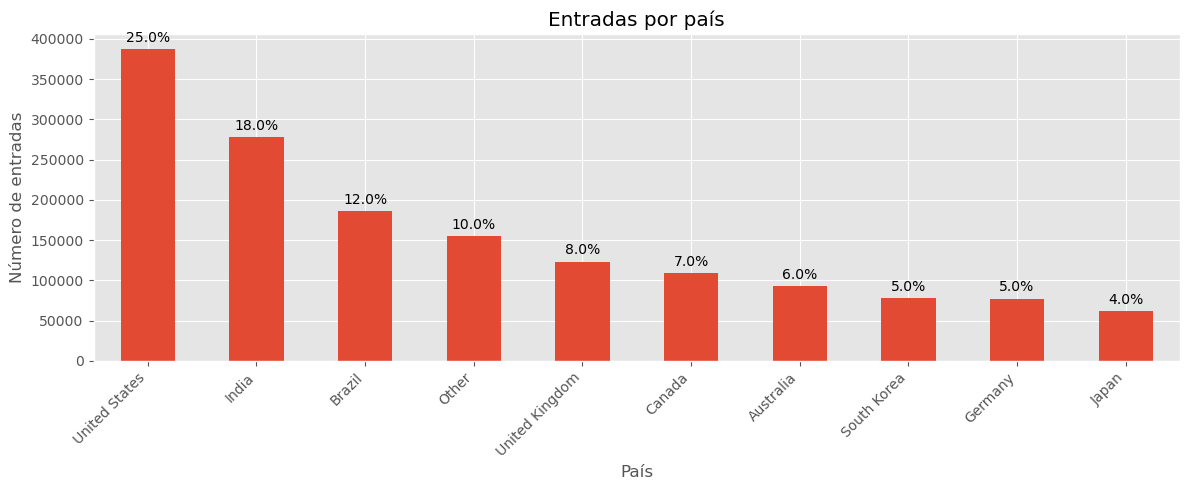

In [13]:
counts = df["country"].value_counts()
pct = counts / counts.sum() * 100

ax = counts.plot(kind="bar", title="Entradas por país", figsize=(12, 5))
ax.set_ylabel("Número de entradas")
ax.set_xlabel("País")

labels = [f"{p:.1f}%" for p in pct]
ax.bar_label(ax.containers[0], labels=labels, padding=3)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Sesgo identificado:** Un cuarto de todos los datos provienen de Estados Unidos, un país con una realidad económica, política, y cultural extremadamente distinta a la mayoría del resto de países de la muestra. Esto puede afectar la generalización de hallazgos.

### 4.2 Distribución de horas de trabajo semanales

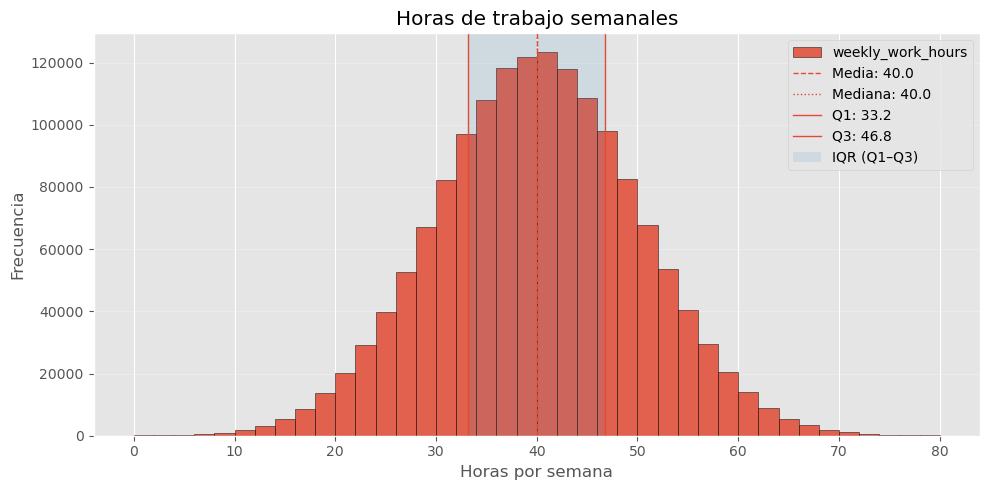

In [14]:
s = df["weekly_work_hours"].dropna()

ax = s.plot(
    kind="hist",
    bins=40,
    figsize=(10, 5),
    alpha=0.85,
    edgecolor="black",
    linewidth=0.4,
    title="Horas de trabajo semanales"
)

ax.set_xlabel("Horas por semana")
ax.set_ylabel("Frecuencia")
ax.grid(axis="y", alpha=0.3)

# Mean / median
mean_ = s.mean()
med_  = s.median()
ax.axvline(mean_, linestyle="--", linewidth=1, label=f"Media: {mean_:.1f}")
ax.axvline(med_,  linestyle=":",  linewidth=1, label=f"Mediana: {med_:.1f}")

# Quartiles (Q1, Q3) + optional IQR band
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)

ax.axvline(q1, linestyle="-", linewidth=1, label=f"Q1: {q1:.1f}")
ax.axvline(q3, linestyle="-", linewidth=1, label=f"Q3: {q3:.1f}")
ax.axvspan(q1, q3, alpha=0.12, label="IQR (Q1–Q3)")


ax.legend()
plt.tight_layout()
plt.show()

### 4.3 Distribuciones de variables clave numéricas

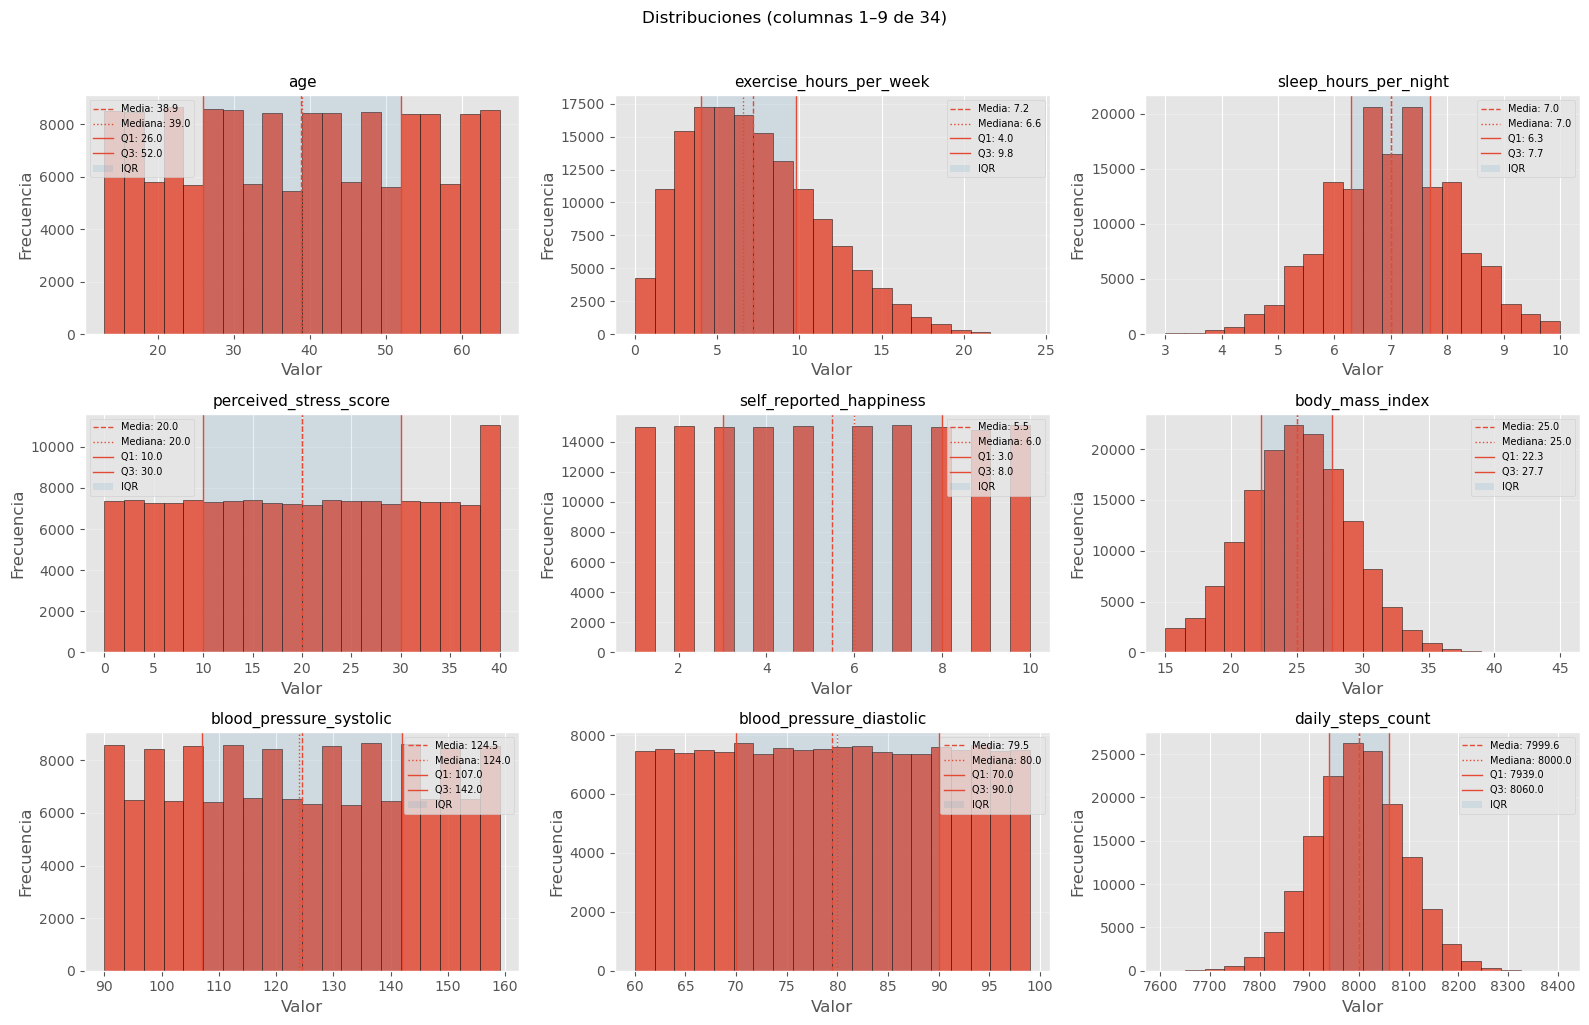

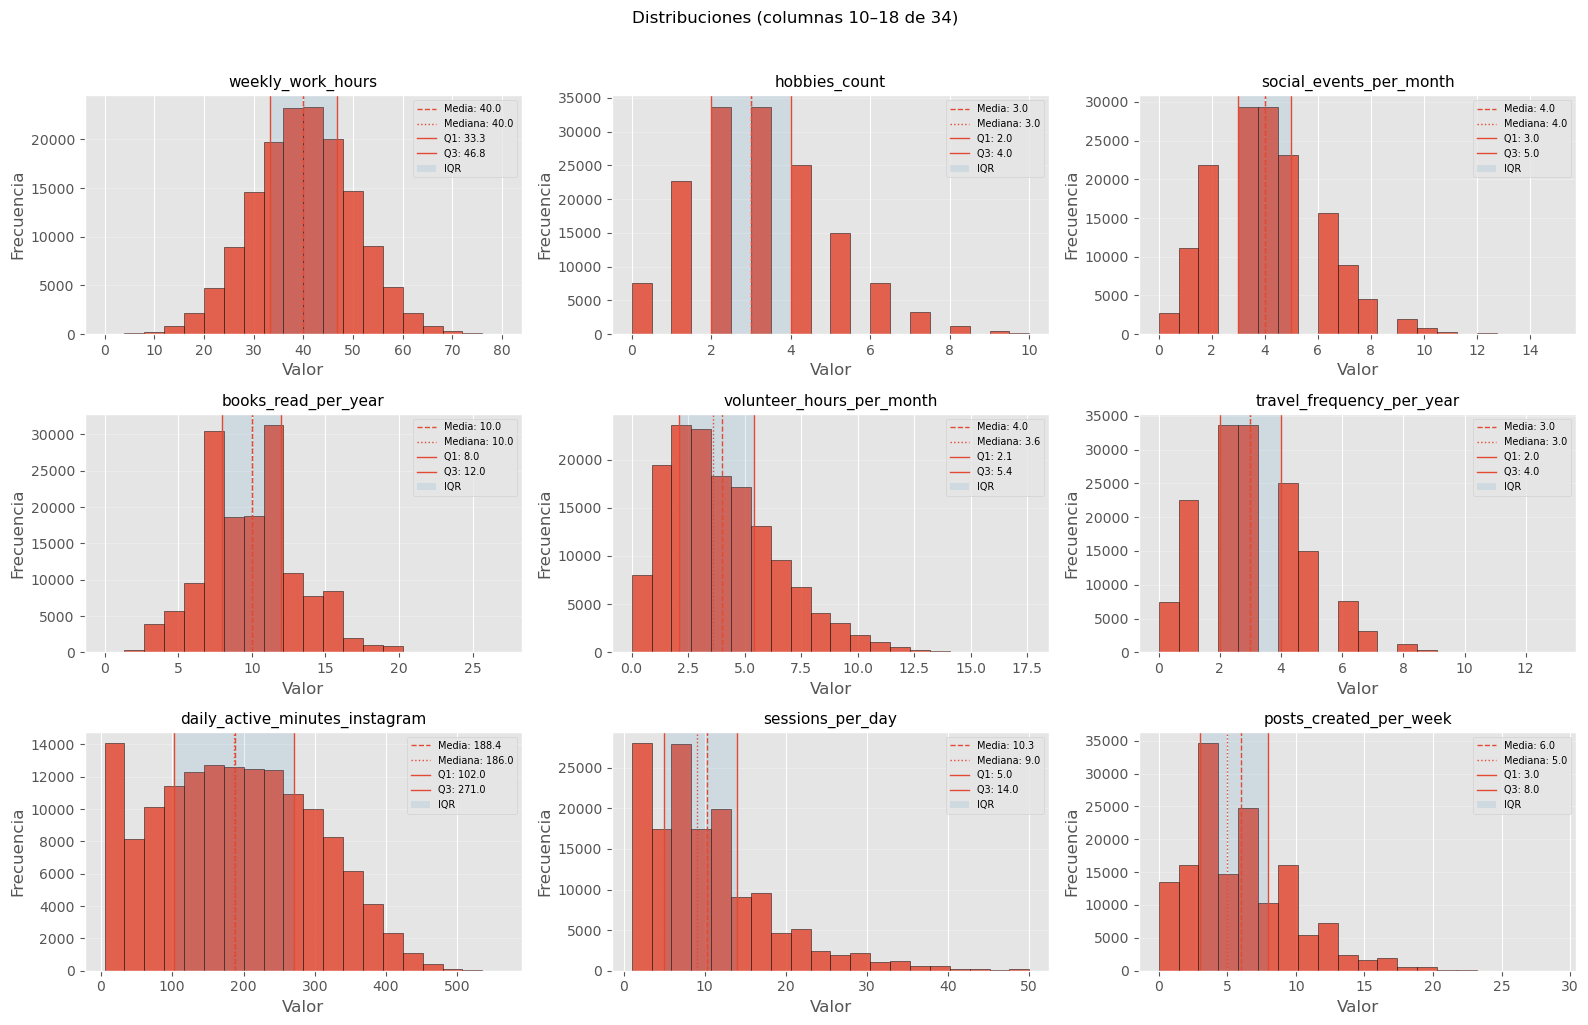

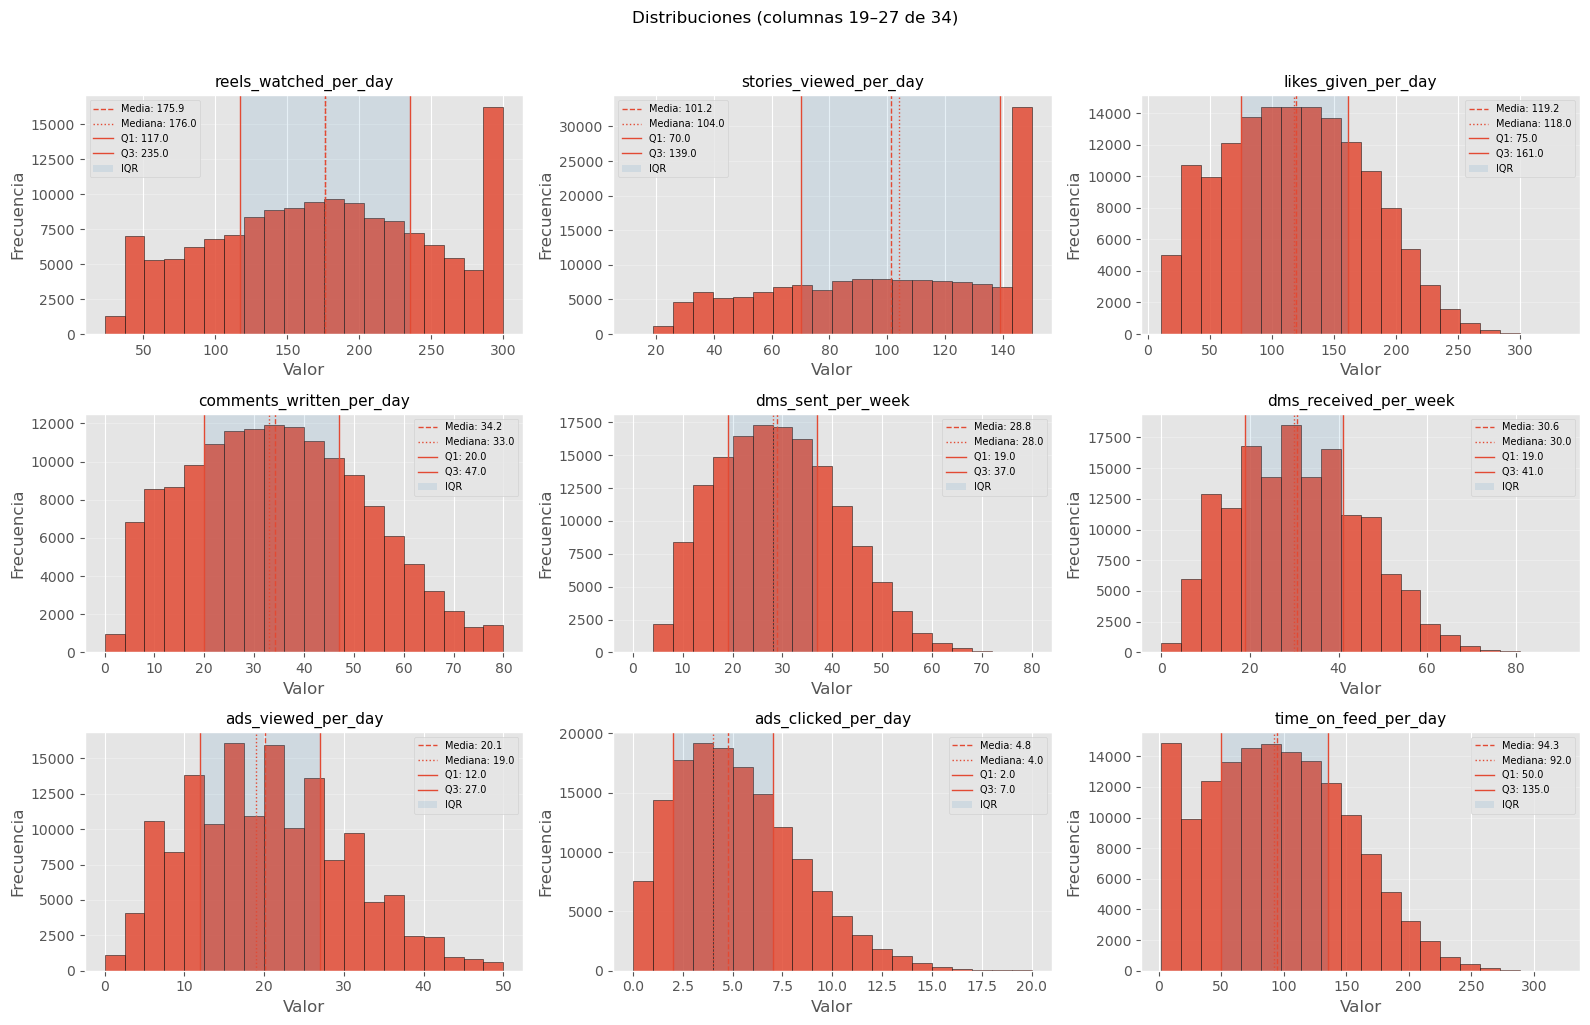

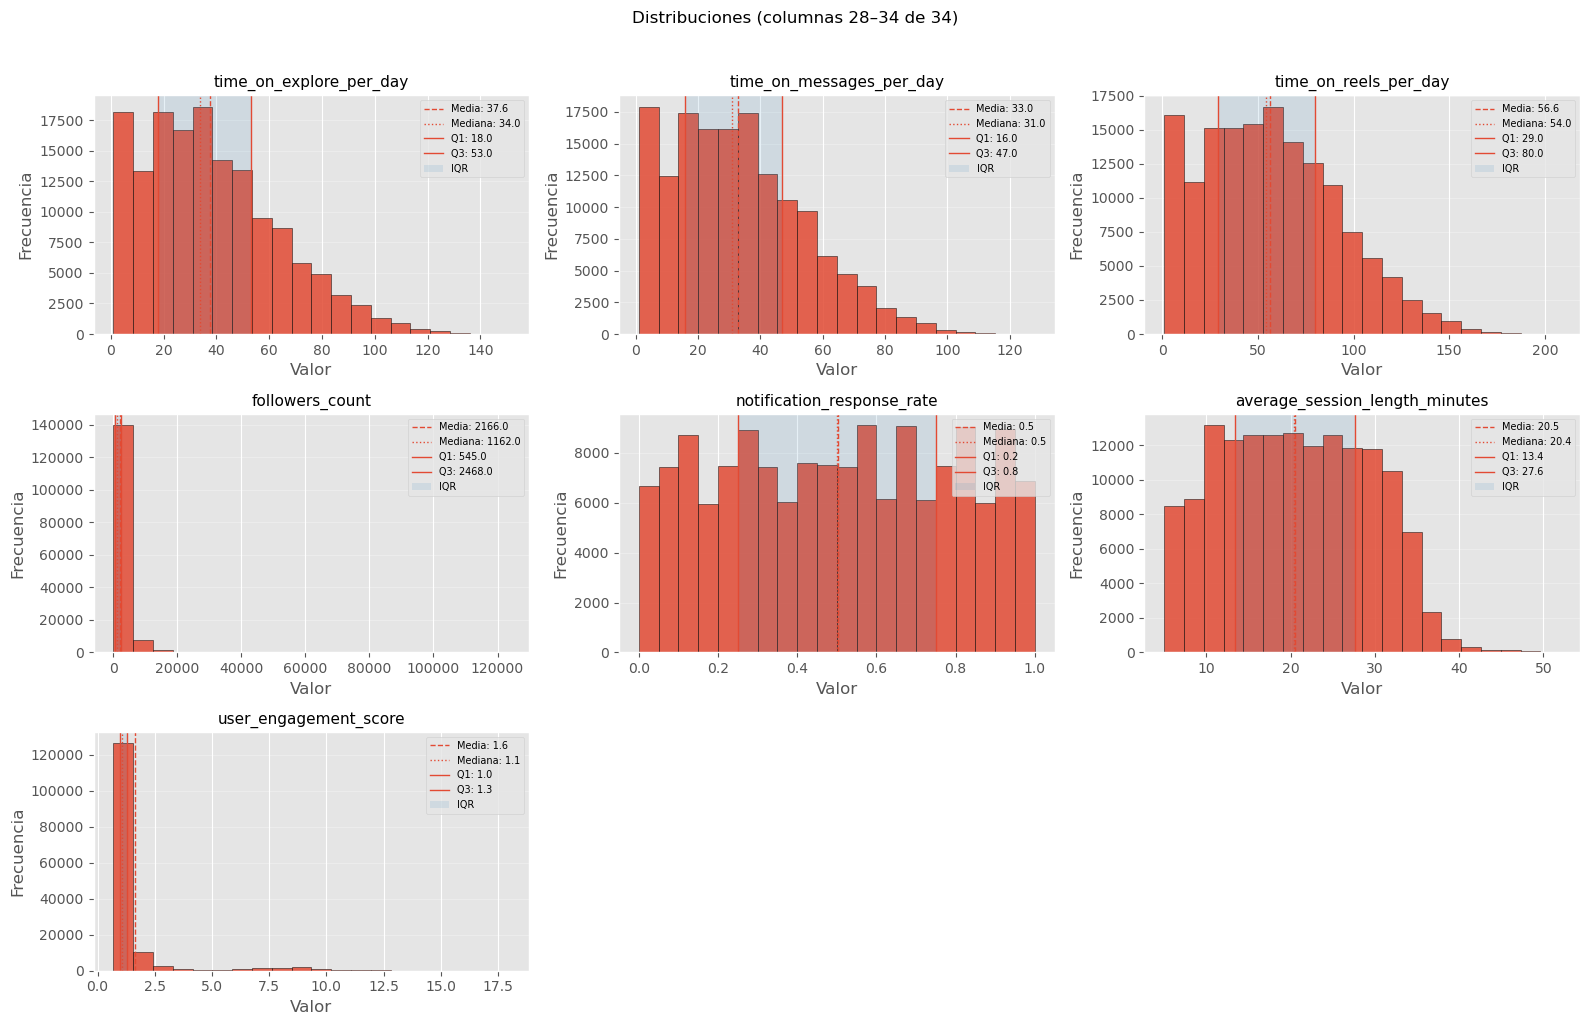

In [15]:
num_cols = df_filtered.select_dtypes(include="number").columns.tolist()
sample_df = df.sample(n=min(150_000, len(df)), random_state=42)

bins = 20
nrows, ncols = 3, 3
per_fig = nrows * ncols  # 9 plots per figure

for start in range(0, len(num_cols), per_fig):
    cols_batch = num_cols[start:start + per_fig]

    fig, axes = plt.subplots(nrows, ncols, figsize=(16, 10))
    axes = axes.flatten()

    for i, col in enumerate(cols_batch):
        s = sample_df[col].dropna()

        ax = axes[i]
        ax.hist(
            s,
            bins=bins,
            alpha=0.85,
            edgecolor="black",
            linewidth=0.4
        )

        ax.set_title(col, fontsize=11)
        ax.set_xlabel("Valor")
        ax.set_ylabel("Frecuencia")
        ax.grid(axis="y", alpha=0.3)

        # Mean / median
        mean_ = s.mean()
        med_  = s.median()
        ax.axvline(mean_, linestyle="--", linewidth=1, label=f"Media: {mean_:.1f}")
        ax.axvline(med_,  linestyle=":",  linewidth=1, label=f"Mediana: {med_:.1f}")

        # Quartiles + IQR band
        q1 = s.quantile(0.25)
        q3 = s.quantile(0.75)
        ax.axvline(q1, linestyle="-", linewidth=1, label=f"Q1: {q1:.1f}")
        ax.axvline(q3, linestyle="-", linewidth=1, label=f"Q3: {q3:.1f}")
        ax.axvspan(q1, q3, alpha=0.12, label="IQR")

        ax.legend(fontsize=7)

    # Turn off unused axes (if last figure has < 9 cols)
    for j in range(i + 1, per_fig):
        axes[j].axis("off")

    fig.suptitle(f"Distribuciones (columnas {start+1}–{start+len(cols_batch)} de {len(num_cols)})", y=1.02)
    plt.tight_layout()
    plt.show()

**Hallazgo:** Existe una predominancia de la distribución normal en las features presentes en el dataset, y unas cuantas con distribución relativamente uniforme.

---
## 5) EDA - Análisis Relacional (Hipótesis de Negocio)

### H1: Mayor uso de Instagram → Mayor estrés percibido

#### 5.1 Matriz de correlación (variables clave)

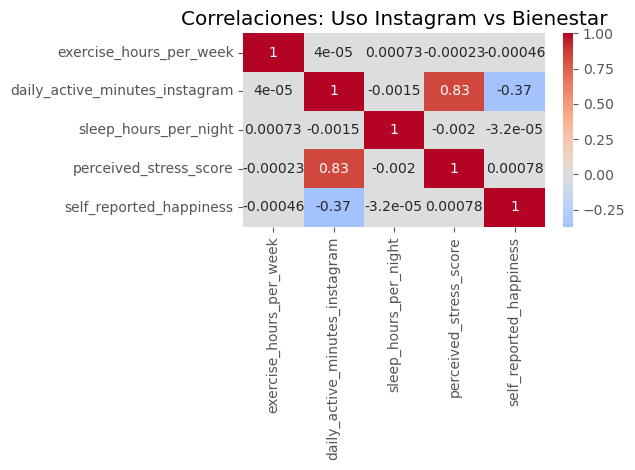

In [16]:
df_corr = df[[
    'exercise_hours_per_week',
    'daily_active_minutes_instagram',
    'sleep_hours_per_night',
    'perceived_stress_score',
    'self_reported_happiness'
]].corr()

sns.heatmap(df_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlaciones: Uso Instagram vs Bienestar')
plt.tight_layout()
plt.show()

Se evidencia una **correlación directa** entre cantidad de minutos en instagram y el estrés percibido, así como una **correlación inversa** entre minutos en instagram y felicidad percibida.

#### 5.2 Relación: Minutos en Instagram vs Estrés Percibido

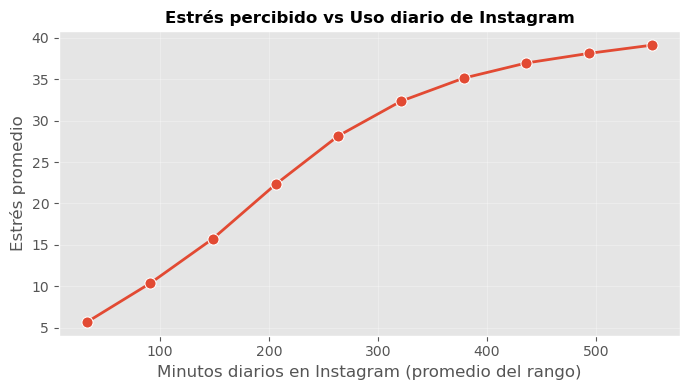

Correlación de Pearson: 0.835
Correlación de Spearman: 0.841


In [17]:
# Crear bins
df['usage_bin'] = pd.cut(
    df['daily_active_minutes_instagram'],
    bins=10
)

df['usage_bin_mid'] = df['usage_bin'].apply(lambda x: x.mid)
stress_by_usage = (
    df.groupby('usage_bin_mid', observed=True)['perceived_stress_score']
      .mean()
      .reset_index()
)

plt.figure(figsize=(7,4))
sns.lineplot(
    data=stress_by_usage,
    x='usage_bin_mid',
    y='perceived_stress_score',
    marker='o',
    linewidth=2,
    markersize=8
)

plt.title('Estrés percibido vs Uso diario de Instagram', fontsize=12, fontweight='bold')
plt.xlabel('Minutos diarios en Instagram (promedio del rango)')
plt.ylabel('Estrés promedio')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Correlaciones
pearson_corr = df['daily_active_minutes_instagram'].corr(df['perceived_stress_score'])
print(f"Correlación de Pearson: {pearson_corr:.3f}")

spearman_corr = df['daily_active_minutes_instagram'].corr(df['perceived_stress_score'], method='spearman')
print(f"Correlación de Spearman: {spearman_corr:.3f}")

**Hallazgo:** A mayor uso de Instagram (minutos), mayor es el estrés percibido.
- **Evidencia:** Correlaciones positivas tanto de Pearson como de Spearman.
- **Implicación de negocio:** Un aumento en engagement debe monitorear cuidadosamente los niveles de estrés.
- **Riesgo:** Si la plataforma crece sin controles, podría amplificar estrés psicológico en usuarios.

**Hipótesis alterna:** Las personas tienden a usar más las redes sociales cuando están estresadas. La misma correlación pero de manera inversa.

### H2: Mayor uso de Instagram → Menor felicidad percibida

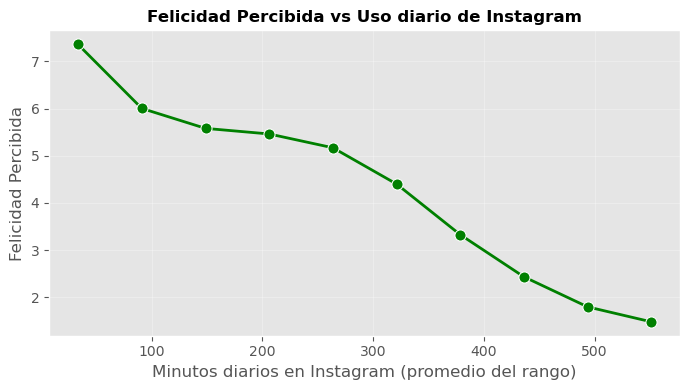

Correlación de Pearson: -0.372
Correlación de Spearman: -0.359


In [18]:
df['usage_bin'] = pd.cut(
    df['daily_active_minutes_instagram'],
    bins=10
)

df['usage_bin_mid'] = df['usage_bin'].apply(lambda x: x.mid)

happiness_by_usage = (
    df.groupby('usage_bin_mid', observed=True)['self_reported_happiness']
      .mean()
      .reset_index()
)

plt.figure(figsize=(7,4))
sns.lineplot(
    data=happiness_by_usage,
    x='usage_bin_mid',
    y='self_reported_happiness',
    marker='o',
    linewidth=2,
    markersize=8,
    color='green'
)

plt.title('Felicidad Percibida vs Uso diario de Instagram', fontsize=12, fontweight='bold')
plt.xlabel('Minutos diarios en Instagram (promedio del rango)')
plt.ylabel('Felicidad Percibida')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Correlaciones
pearson_corr = df['daily_active_minutes_instagram'].corr(df['self_reported_happiness'])
print(f"Correlación de Pearson: {pearson_corr:.3f}")

spearman_corr = df['daily_active_minutes_instagram'].corr(df['self_reported_happiness'], method='spearman')
print(f"Correlación de Spearman: {spearman_corr:.3f}")

**Hallazgo:** A mayor uso de Instagram, menor felicidad auto-reportada.
- **Evidencia:** Correlación negativa con ambos métodos de correlación.
- **Implicación de negocio:** Existe un trade-off entre crecimiento de engagement y satisfacción del usuario.
- **Acción recomendada:** Implementar "límites saludables" o features de bienestar (p. ej., recordatorios de descanso, limitadores de tiempo).


### H3: ¿Trabajar más horas se asocia con más estrés?

**Comparativa:** A diferencia del uso de Instagram, las horas de trabajo no muestran la misma correlación.

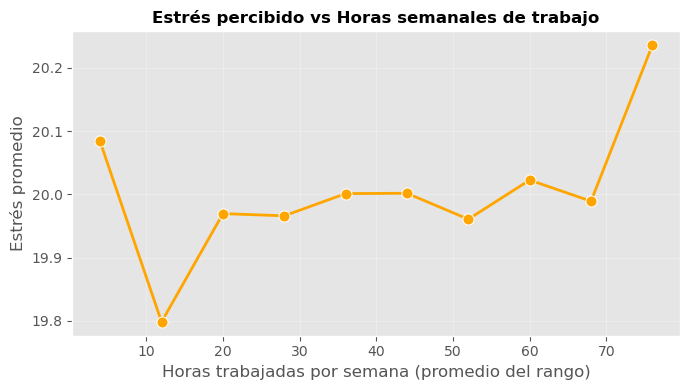

Correlación de Pearson (trabajo vs estrés): 0.001
Correlación de Spearman (trabajo vs estrés): 0.000


In [19]:
df['work_hours_bin'] = pd.cut(
    df['weekly_work_hours'],
    bins=10
)

df['work_hours_bin_mid'] = df['work_hours_bin'].apply(lambda x: x.mid)

stress_by_work = (
    df.groupby('work_hours_bin_mid', observed=True)['perceived_stress_score']
      .mean()
      .reset_index()
)

plt.figure(figsize=(7,4))
sns.lineplot(
    data=stress_by_work,
    x='work_hours_bin_mid',
    y='perceived_stress_score',
    marker='o',
    linewidth=2,
    markersize=8,
    color='orange'
)

plt.title('Estrés percibido vs Horas semanales de trabajo', fontsize=12, fontweight='bold')
plt.xlabel('Horas trabajadas por semana (promedio del rango)')
plt.ylabel('Estrés promedio')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

pearson_corr = df['weekly_work_hours'].corr(df['perceived_stress_score'])
print(f"Correlación de Pearson (trabajo vs estrés): {pearson_corr:.3f}")

spearman_corr = df['weekly_work_hours'].corr(df['perceived_stress_score'], method='spearman')
print(f"Correlación de Spearman (trabajo vs estrés): {spearman_corr:.3f}")

**Hallazgo:** Trabajar más horas **NO tiene una correlación clara** con mayor estrés percibido.
- **Implicación:** El tipo de actividad importa. El trabajo es una actividad productiva; las redes sociales pueden percibirse como "pasiva" o de menor valor, generando estrés por falta de propósito.
- **Insight estratégico:** Posibilidad de realinear el uso de Instagram hacia contenido más constructivo o interacciones más significativas.

### Hipótesis adicional: La gente sin trabajo presenta un mayor nivel de estrés.

En la gráfica anterior parece haber un pico de estrés en bajas horas de trabajo.

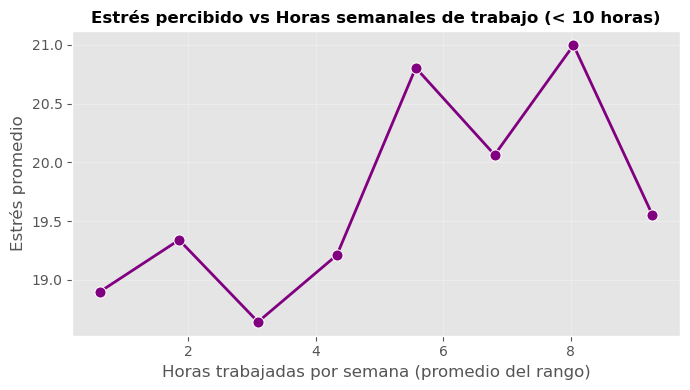


Correlación de Pearson (trabajo <10h vs estrés): 0.012
Correlación de Spearman (trabajo <10h vs estrés): -0.003
Número de registros con <10 horas de trabajo: 2042


In [22]:
# Análisis enfocado: Work hours < 10
df_under_10 = df[df['weekly_work_hours'] < 10].copy()

df_under_10['work_hours_bin'] = pd.cut(
    df_under_10['weekly_work_hours'],
    bins=8
)

df_under_10['work_hours_bin_mid'] = df_under_10['work_hours_bin'].apply(lambda x: x.mid)

stress_by_work_under10 = (
    df_under_10.groupby('work_hours_bin_mid', observed=True)['perceived_stress_score']
      .mean()
      .reset_index()
)

plt.figure(figsize=(7,4))
sns.lineplot(
    data=stress_by_work_under10,
    x='work_hours_bin_mid',
    y='perceived_stress_score',
    marker='o',
    linewidth=2,
    markersize=8,
    color='purple'
)

plt.title('Estrés percibido vs Horas semanales de trabajo (< 10 horas)', fontsize=12, fontweight='bold')
plt.xlabel('Horas trabajadas por semana (promedio del rango)')
plt.ylabel('Estrés promedio')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

pearson_corr_under10 = df_under_10['weekly_work_hours'].corr(df_under_10['perceived_stress_score'])
print(f"\nCorrelación de Pearson (trabajo <10h vs estrés): {pearson_corr_under10:.3f}")

spearman_corr_under10 = df_under_10['weekly_work_hours'].corr(df_under_10['perceived_stress_score'], method='spearman')
print(f"Correlación de Spearman (trabajo <10h vs estrés): {spearman_corr_under10:.3f}")
print(f"Número de registros con <10 horas de trabajo: {len(df_under_10)}")

Aunque la gráfica pareciera mostrar un rango de horas de trabajo donde el estrés es mayor al resto, las medidas no lo soportan. Por lo que esta hipótesis quedaría descartada.

### H4: Mayor interacción en Instagram → Mayor estrés

**Análisis de interacciones:** ¿Qué tipo de comportamiento en Instagram se asocia más con estrés?

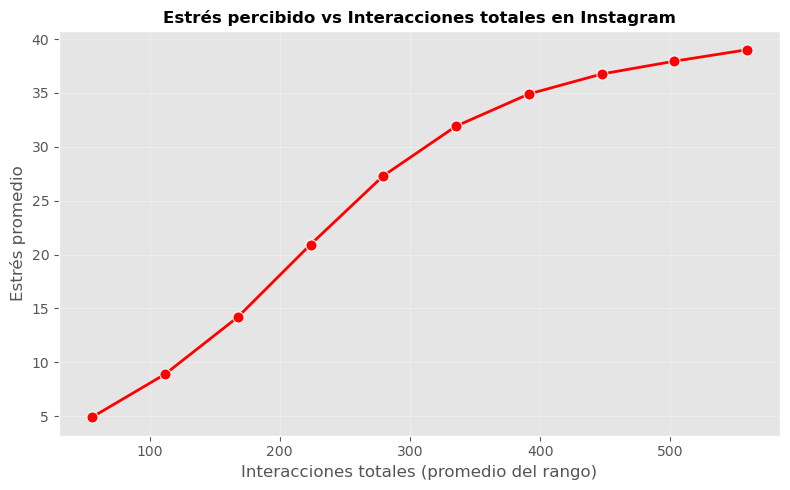

Correlación Pearson (interacciones vs estrés): 0.823
Correlación Spearman (interacciones vs estrés): 0.829


In [21]:
interaction_vars = [
    'posts_created_per_week',
    'likes_given_per_day',
    'comments_written_per_day',
    'dms_sent_per_week',
    'dms_received_per_week'
]

# Crear columna 'interaccion' como suma de todas
df['interaccion'] = df[interaction_vars].sum(axis=1)

# Crear bins para la columna 'interaccion'
df['interaccion_bin'] = pd.cut(df['interaccion'], bins=10)
df['interaccion_bin_mid'] = df['interaccion_bin'].apply(lambda x: x.mid if x is not np.nan else np.nan)

# Calcular estrés promedio por bin
stress_by_interaccion = (
    df.groupby('interaccion_bin_mid', observed=True)['perceived_stress_score']
      .mean()
      .reset_index()
)

# Graficar tendencia
plt.figure(figsize=(8,5))
sns.lineplot(
    data=stress_by_interaccion,
    x='interaccion_bin_mid',
    y='perceived_stress_score',
    marker='o',
    linewidth=2,
    markersize=8,
    color='red'
)
plt.title('Estrés percibido vs Interacciones totales en Instagram', fontsize=12, fontweight='bold')
plt.xlabel('Interacciones totales (promedio del rango)')
plt.ylabel('Estrés promedio')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Calcular correlaciones
pearson_corr = df['interaccion'].corr(df['perceived_stress_score'])
spearman_corr = df['interaccion'].corr(df['perceived_stress_score'], method='spearman')

print(f"Correlación Pearson (interacciones vs estrés): {pearson_corr:.3f}")
print(f"Correlación Spearman (interacciones vs estrés): {spearman_corr:.3f}")

**Hallazgo:** Mayor cantidad de interacciones en Instagram se asocia con mayor estrés percibido.
- **Evidencia:** Correlación positiva entre cantidad de interacciones y estrés.
- **Implicación:** La **calidad de interacciones importa más que la cantidad**. Posibles causas:
  - Comparación social
  - Presión por mantener conversaciones
  - Compulsión por responder rápido a DMs
- **Acción recomendada:** 
  - Implementar herramientas de filtrado de comentarios negativos
  - Permitir respuestas "en diferido" sin notificaciones inmediatas
  - Promover interacciones más significativas


**Hipótesis alterna:** la correlación positiva puede estar relacionada con el tiempo, en lugar de específicamente con la cantidad de interacciones.

#### Análisis detallado por tipo de interacción

Se desglosan las relaciones entre estrés y diferentes tipos de interacciones específicas en Instagram, para descartar que sea un tipo de interacción específica lo que genera mayor estres y no todas las interacciones en general.

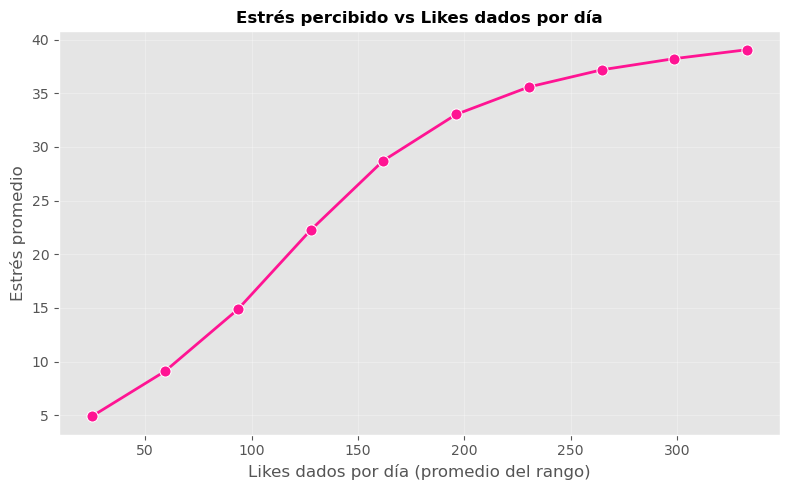

Correlación Pearson (likes vs estrés): 0.819
Correlación Spearman (likes vs estrés): 0.826


In [25]:
# Análisis 1: Likes dados vs Estrés
df['likes_bin'] = pd.cut(
    df['likes_given_per_day'],
    bins=10
)

df['likes_bin_mid'] = df['likes_bin'].apply(lambda x: x.mid if x is not np.nan else np.nan)

stress_by_likes = (
    df.groupby('likes_bin_mid', observed=True)['perceived_stress_score']
      .mean()
      .reset_index()
)

plt.figure(figsize=(8,5))
sns.lineplot(
    data=stress_by_likes,
    x='likes_bin_mid',
    y='perceived_stress_score',
    marker='o',
    linewidth=2,
    markersize=8,
    color='#FF1493'  # Deep pink
)
plt.title('Estrés percibido vs Likes dados por día', fontsize=12, fontweight='bold')
plt.xlabel('Likes dados por día (promedio del rango)')
plt.ylabel('Estrés promedio')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

pearson_likes = df['likes_given_per_day'].corr(df['perceived_stress_score'])
spearman_likes = df['likes_given_per_day'].corr(df['perceived_stress_score'], method='spearman')

print(f"Correlación Pearson (likes vs estrés): {pearson_likes:.3f}")
print(f"Correlación Spearman (likes vs estrés): {spearman_likes:.3f}")


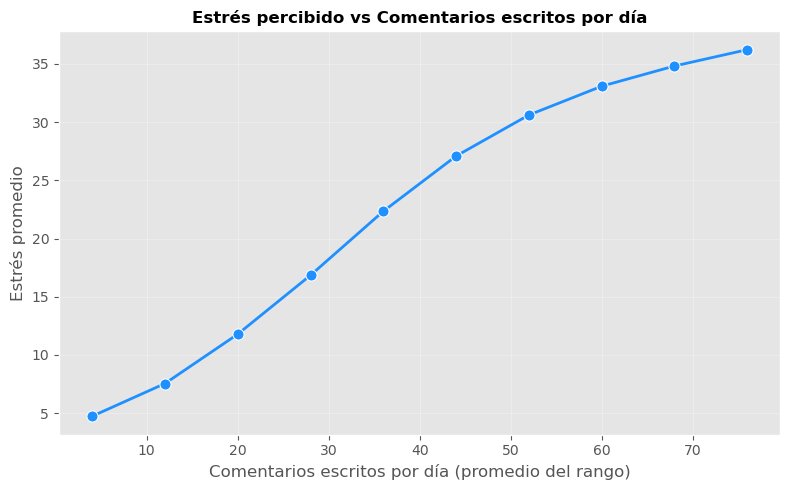

Correlación Pearson (comentarios vs estrés): 0.787
Correlación Spearman (comentarios vs estrés): 0.796


In [26]:
# Análisis 2: Comentarios escritos vs Estrés
df['comments_bin'] = pd.cut(
    df['comments_written_per_day'],
    bins=10
)

df['comments_bin_mid'] = df['comments_bin'].apply(lambda x: x.mid if x is not np.nan else np.nan)

stress_by_comments = (
    df.groupby('comments_bin_mid', observed=True)['perceived_stress_score']
      .mean()
      .reset_index()
)

plt.figure(figsize=(8,5))
sns.lineplot(
    data=stress_by_comments,
    x='comments_bin_mid',
    y='perceived_stress_score',
    marker='o',
    linewidth=2,
    markersize=8,
    color='#1E90FF'  # Dodger blue
)
plt.title('Estrés percibido vs Comentarios escritos por día', fontsize=12, fontweight='bold')
plt.xlabel('Comentarios escritos por día (promedio del rango)')
plt.ylabel('Estrés promedio')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

pearson_comments = df['comments_written_per_day'].corr(df['perceived_stress_score'])
spearman_comments = df['comments_written_per_day'].corr(df['perceived_stress_score'], method='spearman')

print(f"Correlación Pearson (comentarios vs estrés): {pearson_comments:.3f}")
print(f"Correlación Spearman (comentarios vs estrés): {spearman_comments:.3f}")


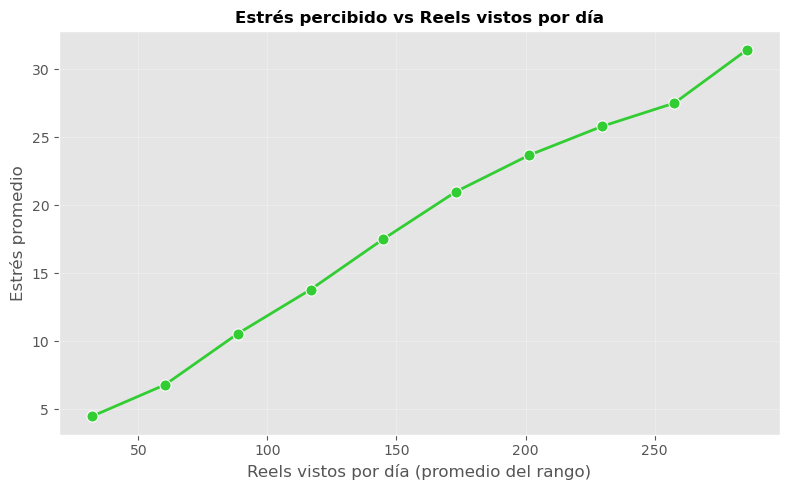

Correlación Pearson (reels vs estrés): 0.675
Correlación Spearman (reels vs estrés): 0.673


In [27]:
# Análisis 3: Reels vistos vs Estrés
df['reels_bin'] = pd.cut(
    df['reels_watched_per_day'],
    bins=10
)

df['reels_bin_mid'] = df['reels_bin'].apply(lambda x: x.mid if x is not np.nan else np.nan)

stress_by_reels = (
    df.groupby('reels_bin_mid', observed=True)['perceived_stress_score']
      .mean()
      .reset_index()
)

plt.figure(figsize=(8,5))
sns.lineplot(
    data=stress_by_reels,
    x='reels_bin_mid',
    y='perceived_stress_score',
    marker='o',
    linewidth=2,
    markersize=8,
    color='#32CD32'  # Lime green
)
plt.title('Estrés percibido vs Reels vistos por día', fontsize=12, fontweight='bold')
plt.xlabel('Reels vistos por día (promedio del rango)')
plt.ylabel('Estrés promedio')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

pearson_reels = df['reels_watched_per_day'].corr(df['perceived_stress_score'])
spearman_reels = df['reels_watched_per_day'].corr(df['perceived_stress_score'], method='spearman')

print(f"Correlación Pearson (reels vs estrés): {pearson_reels:.3f}")
print(f"Correlación Spearman (reels vs estrés): {spearman_reels:.3f}")


Todos los tipos de interacción mantienen una correlación positiva alta con el estrés. Aunque la cantidad de likes dados parece tener una correlación un poco más fuerte en relación a las otras dos variables

---
## 6) Interpretación de Negocio e Insights Clave

### Insight 1: Relación Inversa Entre Uso de Instagram y Bienestar
- **Hallazgo:** Los usuarios que más tiempo pasan en Instagram reportan mayor estrés y menor felicidad.
- **Correlaciones:** Estrés (+), Felicidad (−)
- **Implicación:** Meta enfrenta un dilema ético real: maximizar engagement significa potencialmente deteriorar la salud mental de los usuarios.
- **Acción:** Incorporar "engagement saludable" como métrica de éxito, no solo minutos de uso.

### Insight 2: La Naturaleza de la Actividad Importa Más que la Duración
- **Hallazgo:** Trabajar más horas NO correlaciona con más estrés, pero pasar tiempo en Instagram sí.
- **Implicación:** El tipo de actividad es crítico. Las actividades **productivas o con propósito** (trabajo) no generan el mismo estrés que las **pasivas o comparativas** (scroll en Instagram).
- **Acción:** Rediseñar la plataforma para fomentar interacciones con propósito (comunidades temáticas, aprendizaje, creación colaborativa).

### Insight 3: Interacciones de Alto Volumen Amplifican el Estrés
- **Hallazgo:** Los usuarios más interactivos reportan mayor estrés.
- **Implicación:** Puede haber una **espiral de ansiedad**: cuantas más interacciones, más notificaciones, más presión por responder, más estrés.
- **Acción:** Implementar "healthy friction" (p. ej., delays en notificaciones, límites de sesión recomendados).

### Insight 4: Sesgo Demográfico Importante
- **Hallazgo:** El 25% de la muestra es de EE.UU., lo que puede sesgar las conclusiones.
- **Riesgo:** Las estrategias diseñadas pueden no generalizar a otros mercados con contextos socioeconómicos muy distintos.
- **Acción:** Realizar análisis segmentado por país/región. Validar hipótesis en mercados específicos antes de rollout global.